In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df_home_prices=pd.read_csv('data/home_prices.csv')
df_home_prices.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df_homeprices=pd.read_csv('data/homeprices.csv')
df_homeprices.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
df_homeprices.shape

(5, 2)

In [ ]:
df_homeprices.isnull().sum()

area     0
price    0
dtype: int64

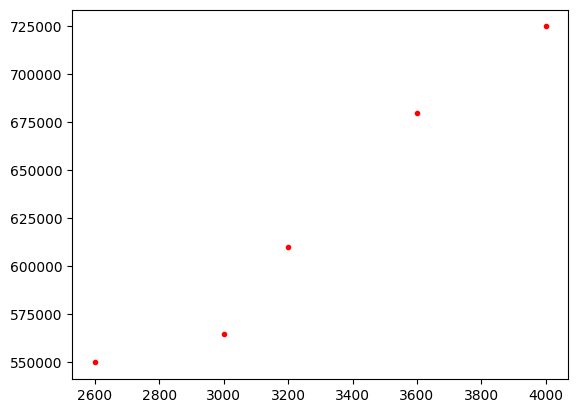

In [ ]:
plt.scatter(df_homeprices.area,df_homeprices.price,color='red',marker='.')

In [ ]:
new_df=df_homeprices.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
prices = df_homeprices[['price']]
prices

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(new_df,prices)

LinearRegression()

In [ ]:
reg.predict(new_df)

array([[533664.38356164],
       [587979.45205479],
       [615136.98630137],
       [669452.05479452],
       [723767.12328767]])

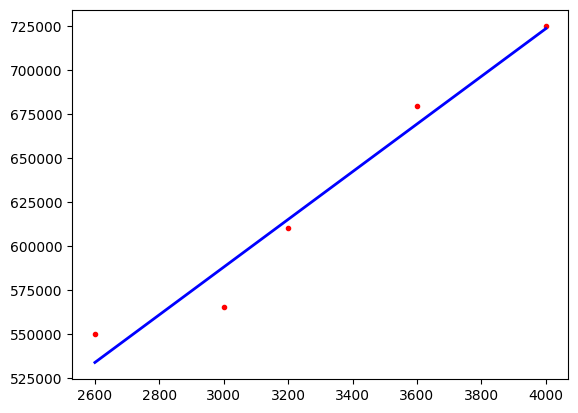

In [ ]:
plt.scatter(df_homeprices.area,df_homeprices.price,color='red',marker='.')
plt.plot(new_df,reg.predict(new_df),color='blue', linewidth=2, label='Linear Regression')

In [ ]:
reg.coef_[0][0],reg.intercept_[0]

(135.78767123287673, 180616.43835616432)

In [ ]:
reg.predict([[3300]])

/home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[628715.75342466]])

In [ ]:
3300*reg.coef_[0][0]+reg.intercept_[0]

628715.7534246575

In [ ]:
area_df=pd.read_csv('data/areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p = reg.predict(area_df)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [ ]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
df_home_prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
bedmed = df_home_prices.bedrooms.median()
bedmed

4.0

In [ ]:
df_home_prices.bedrooms = df_home_prices.bedrooms.fillna(bedmed)

In [ ]:
df_home_prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df_home_prices.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


In [ ]:
regDim = linear_model.LinearRegression()
regDim.fit(df_home_prices.drop('price',axis='columns'),df_home_prices.price)

LinearRegression()

In [ ]:
regDim.predict([[3000,3,30]])

/home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([530725.43066664])

In [ ]:
regDim.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

array([180616.43835616])

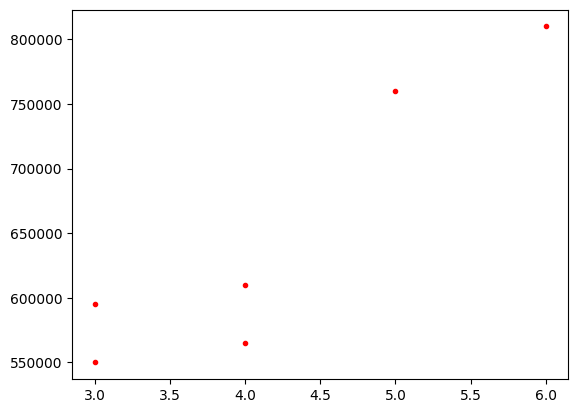

In [ ]:
plt.scatter(df_home_prices.bedrooms,df_home_prices.price,color='red',marker='.')
# plt.plot(df_home_prices,regDim.preict(df_home_prices.drop('price',axis='columns')),color='blue', linewidth=2, label='Linear Regression')

### Using R^2 metric for model evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
df_home_prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
results = {
   
    "R Squared":list()
}

In [ ]:
y_true = df_home_prices['price']

In [ ]:
lr.fit(df_home_prices[['area']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['area']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['bedrooms']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['bedrooms']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['age']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['age']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['area','bedrooms']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['area','bedrooms']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['area','age']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['area','age']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['bedrooms','age']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['bedrooms','age']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
lr.fit(df_home_prices[['area','bedrooms','age']],df_home_prices[['price']])
y_pred = lr.predict(df_home_prices[['area','bedrooms','age']])
results['R Squared'].append(r2_score(y_true,y_pred))

In [ ]:
index = ["area", "bedrooms", "age", "area+bedrooms", "area+age","bedrooms+age","area+bedrooms+age"]
r2_df = pd.DataFrame(results, index=index).transpose()

In [ ]:
r2_df

,area,bedrooms,age,area+bedrooms,area+age,bedrooms+age,area+bedrooms+age
R Squared,0.81266,0.846038,0.539001,0.947483,0.950759,0.868973,0.95502


### Always the feature with highest R^2 score is not good which is why to further compensate the added feature we introduce
- Adjusted R^2 score

In [ ]:
results = {
   
    "Adjusted R Squared":list()
}

## Calculating Adjusted r2 from r2 score
def adjusted_r2(r2, n, d):
  adj_r2 = 1-((1-r2)*(n-1)/(n-d-1))
  results["Adjusted R Squared"].append(adj_r2)

In [ ]:
adjusted_r2(r2_df.iloc[0, :]['area'], 200, 1)
adjusted_r2(r2_df.iloc[0, :]['bedrooms'], 200, 1)
adjusted_r2(r2_df.iloc[0, :]['age'], 200, 1)
adjusted_r2(r2_df.iloc[0, :]['area+bedrooms'], 200, 2)
adjusted_r2(r2_df.iloc[0, :]['area+age'], 200, 2)
adjusted_r2(r2_df.iloc[0, :]['bedrooms+age'], 200, 2)
adjusted_r2(r2_df.iloc[0, :]['area+bedrooms+age'], 200, 3)


In [ ]:
index = ["area", "bedrooms", "age", "area+bedrooms", "area+age","bedrooms+age","area+bedrooms+age"]
adjusted_r2_df = pd.DataFrame(results, index=index).transpose()

In [ ]:
r2_df

,area,bedrooms,age,area+bedrooms,area+age,bedrooms+age,area+bedrooms+age
R Squared,0.81266,0.846038,0.539001,0.947483,0.950759,0.868973,0.95502


In [ ]:
adjusted_r2_df

,area,bedrooms,age,area+bedrooms,area+age,bedrooms+age,area+bedrooms+age
Adjusted R Squared,0.811714,0.845261,0.536672,0.946949,0.950259,0.867642,0.954331
